### A first glimpse at data.
Import necessary libraries.

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN,SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn import metrics
import plotly.express as px
import plotly
plotly.offline.init_notebook_mode(connected=True)

In [72]:
df = pd.read_csv("mcdonalds.csv")

In [73]:
# Check the column names
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

Let's check the number of rows and number of columns in the dataframe.

In [74]:
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns in the dataframe.")

There are 1453 rows and 15 columns in the dataframe.


In [75]:
# Let's take a look at the dataframe
df.head(6)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
5,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,+2,55,Every three months,Male


In [76]:
# Let's check for the null values
df.isna().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

So, we don't have any null values in any column.

In [77]:
gender_summary = df.iloc[:,-1].value_counts(dropna=False)
yummy_summary = df.iloc[:,0].value_counts(dropna=False)
convenient_summary = df.iloc[:,1].value_counts(dropna=False)
spicy_summary = df.iloc[:,2].value_counts(dropna=False)
fattening_summary = df.iloc[:,3].value_counts(dropna=False)
greasy_summary = df.iloc[:,4].value_counts(dropna=False)
fast_summary = df.iloc[:,5].value_counts(dropna=False)
cheap_summary = df.iloc[:,6].value_counts(dropna=False)
tasty_summary = df.iloc[:,7].value_counts(dropna=False)
expensive_summary = df.iloc[:,8].value_counts(dropna=False)
healthy_summary = df.iloc[:,9].value_counts(dropna=False)
visit_frequency_summary = df.iloc[:,-2].value_counts(dropna=False)
age_summary = df.iloc[:,-3].describe().round(2)


print("Gender Summary:")
print(gender_summary)
print()

print("Yummy Summary:")
print(yummy_summary)
print()

print("Convenient Summary:")
print(convenient_summary)
print()

print("Spicy Summary:")
print(spicy_summary)
print()

print("Fattening Summary:")
print(fattening_summary)
print()

print("Greasy Summary:")
print(greasy_summary)
print()

print("Cheap Summary:")
print(cheap_summary)
print()

print("Tasty Summary:")
print(tasty_summary)
print()

print("Expensive Summary:")
print(expensive_summary)
print()

print("Healthy Summary:")
print(healthy_summary)
print()

print("Visit Frequency Summary:")
print(visit_frequency_summary)
print()

print("Age Summary:")
print(age_summary)
print()

Gender Summary:
Female    788
Male      665
Name: Gender, dtype: int64

Yummy Summary:
Yes    803
No     650
Name: yummy, dtype: int64

Convenient Summary:
Yes    1319
No      134
Name: convenient, dtype: int64

Spicy Summary:
No     1317
Yes     136
Name: spicy, dtype: int64

Fattening Summary:
Yes    1260
No      193
Name: fattening, dtype: int64

Greasy Summary:
Yes    765
No     688
Name: greasy, dtype: int64

Cheap Summary:
Yes    870
No     583
Name: cheap, dtype: int64

Tasty Summary:
Yes    936
No     517
Name: tasty, dtype: int64

Expensive Summary:
No     933
Yes    520
Name: expensive, dtype: int64

Healthy Summary:
No     1164
Yes     289
Name: healthy, dtype: int64

Visit Frequency Summary:
Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: VisitFrequency, dtype: int64

Age Summary:
count    1453.00
mean       44.60
std        14.22
min        18

### Descriptive Analysis

Let's visualize various graphs starting with age distribution.

<AxesSubplot:xlabel='Age', ylabel='Density'>

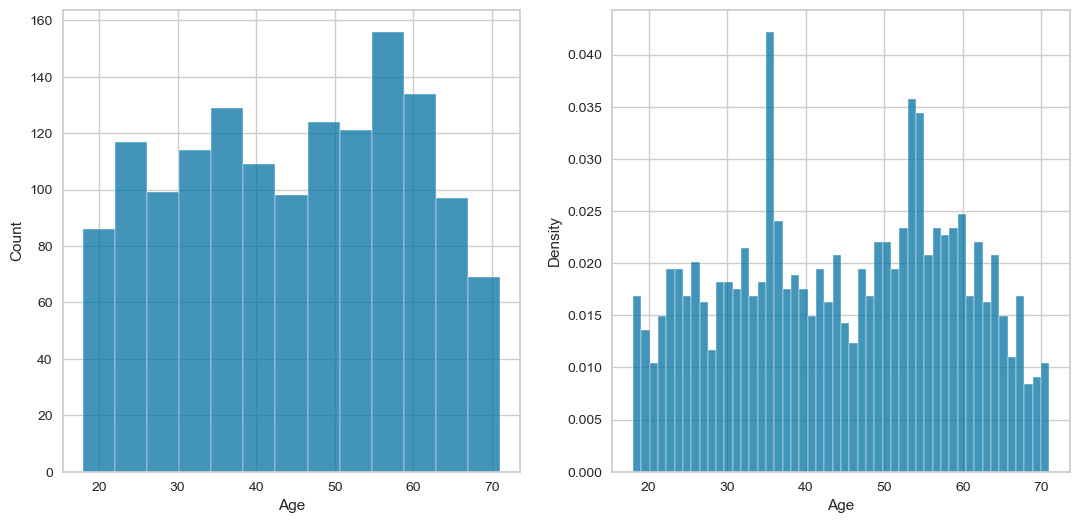

In [78]:
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
sns.histplot(x="Age",data=df)
plt.subplot(1,2,2)
sns.histplot(x="Age",data=df,stat="density",bins=50)

We found that most of the people are of of around 55-60 years old. Let's confirm this by making the visualization more better.

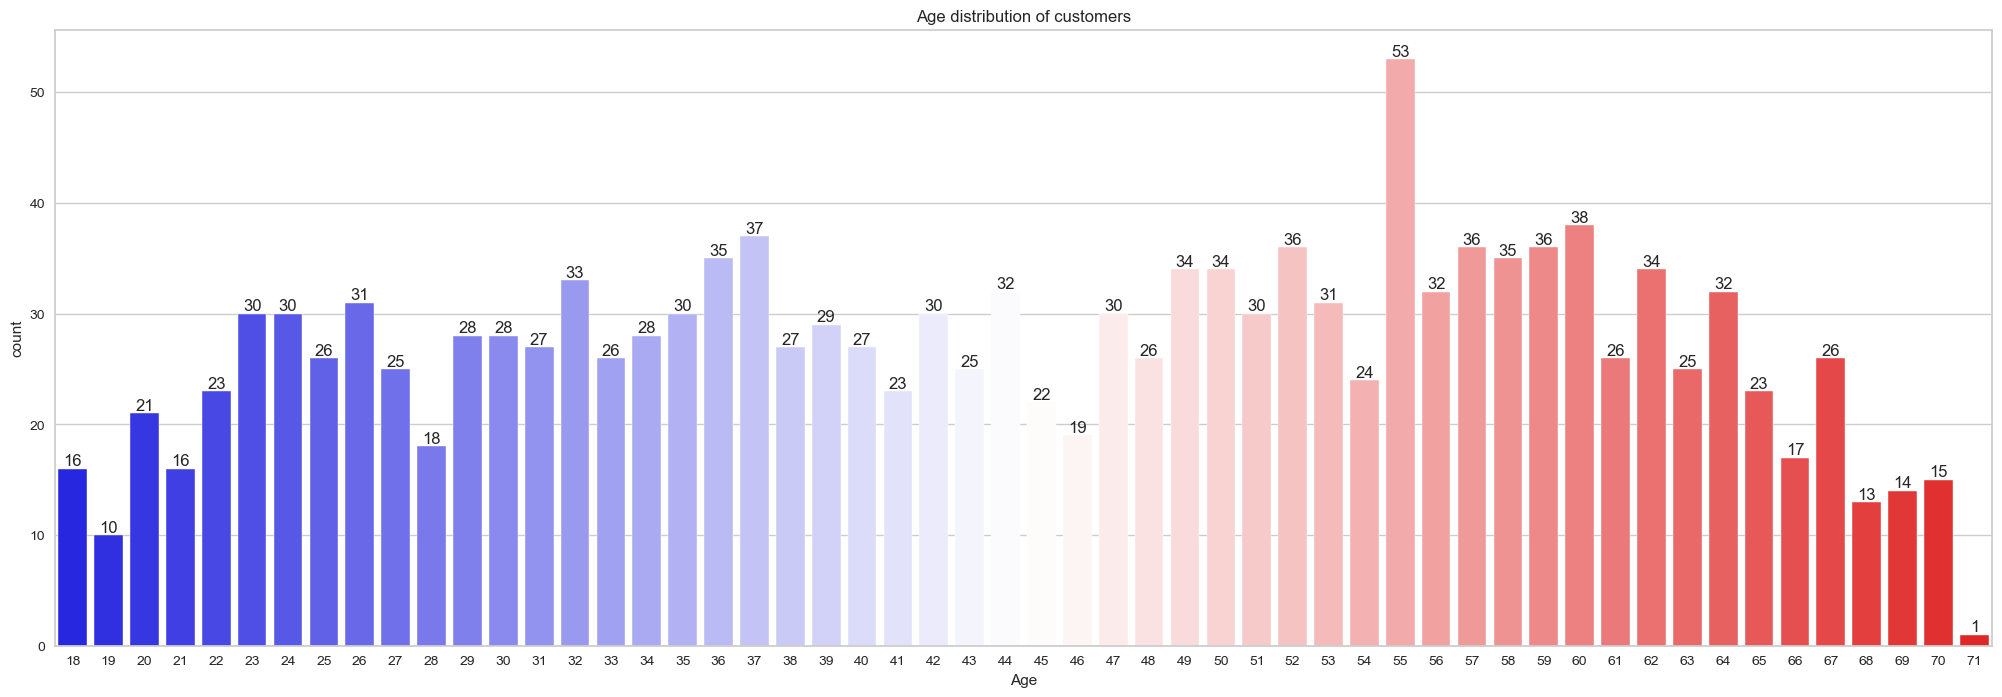

In [79]:
plt.rcParams['figure.figsize'] = (25, 8)
f = sns.countplot(x=df['Age'],palette = 'bwr')
f.bar_label(f.containers[0])
plt.title('Age distribution of customers')
plt.show()

So, we have cofirmred that it is highest for the age group of 55. 

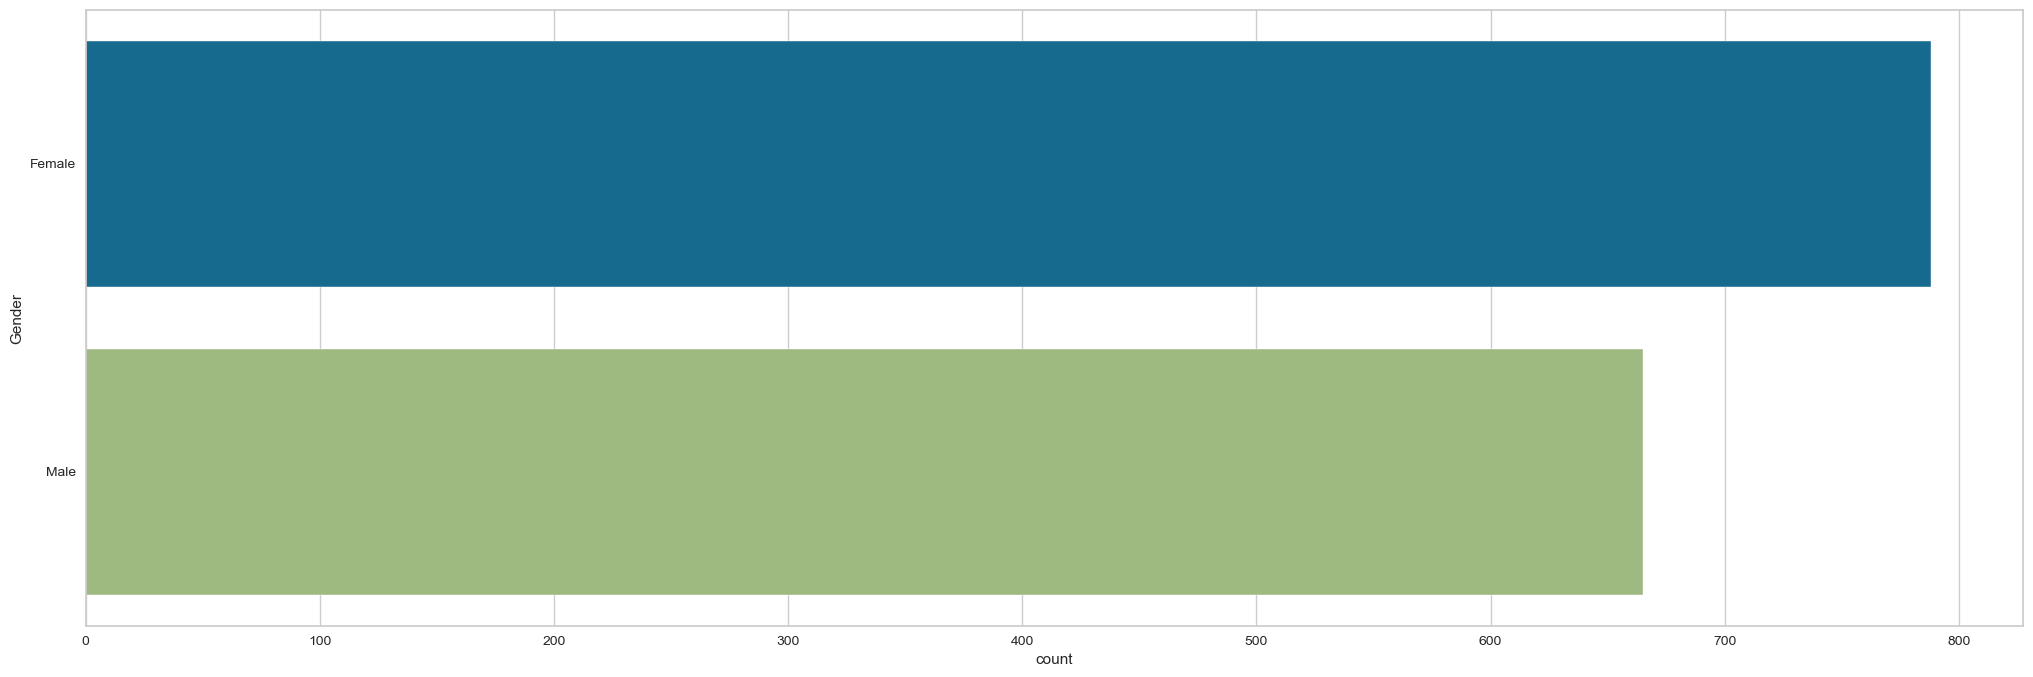

In [80]:
sns.countplot(data=df,y="Gender");

So, we can see there are more females than males. Now let's see the distribution age groups based on gender.

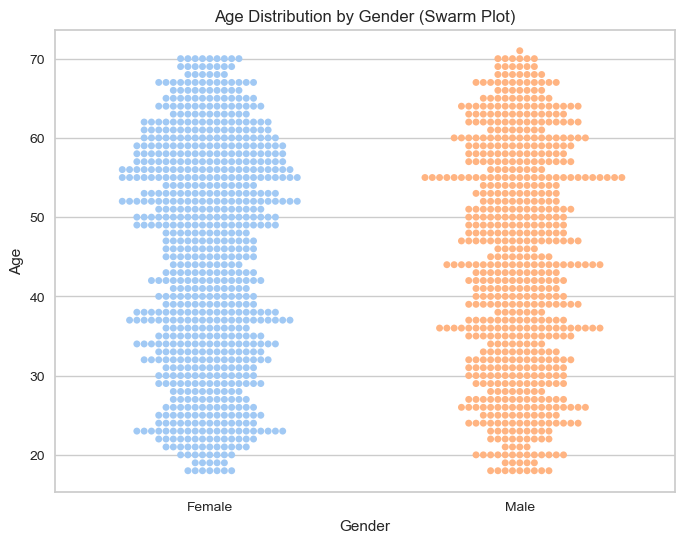

In [81]:
# Create a swarm plot
plt.figure(figsize=(8, 6))
sns.swarmplot(data=df, x='Gender', y='Age',palette="pastel")
plt.title('Age Distribution by Gender (Swarm Plot)')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

As we can see feamle data is more densely distributed as compared to male. Now let's plot the similar swamplot against the likeliness with respect to age group.

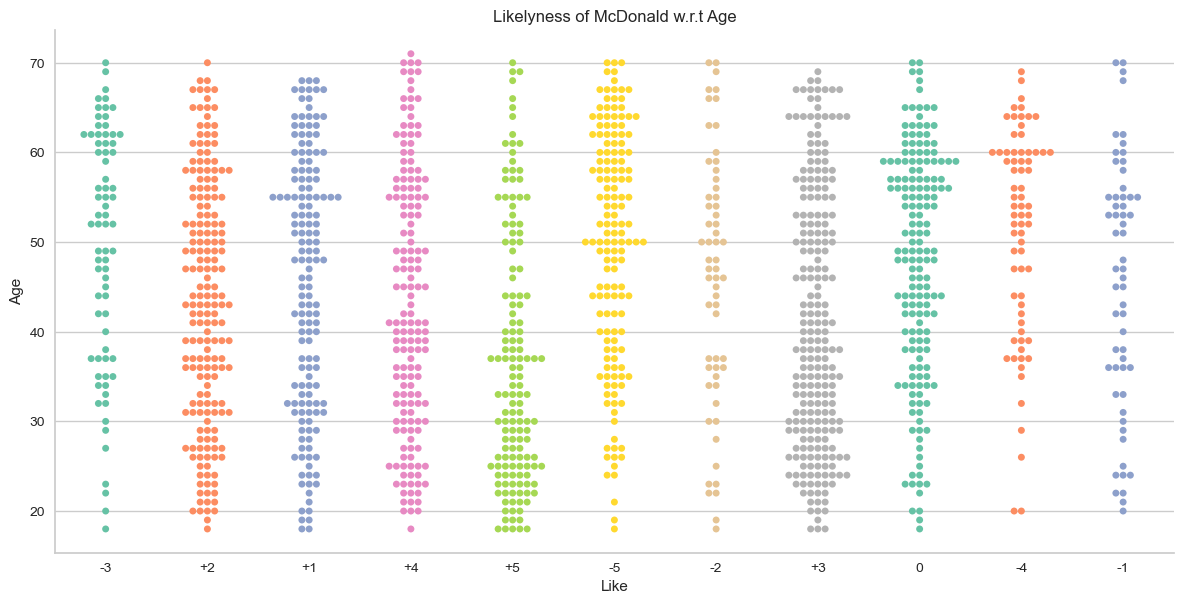

In [82]:
df['Like']= df['Like'].replace({'I hate it!-5': '-5','I love it!+5':'+5'})
sns.catplot(x="Like", y="Age",data=df, 
            orient="v", height=6, aspect=2, palette="Set2",kind="swarm")
plt.title('Likelyness of McDonald w.r.t Age')
plt.show()

Now let's see how many people says "Yes" to which criteria.

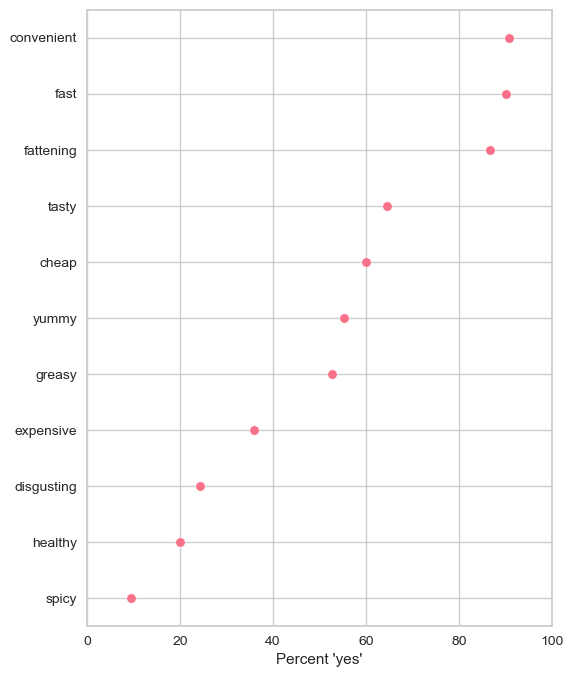

In [83]:
# Calculate the percentage of 'yes' values in columns 1 to 12
yes_percent = 100 * (df.iloc[:, :11] == 'Yes').mean()

# Sort the percentages in ascending order
sorted_percent = yes_percent.sort_values(ascending=False)

# Plotting the dot chart
plt.figure(figsize=(6, 8))
sns.set_style("whitegrid")
sns.set_palette("husl")
sns.scatterplot(x=sorted_percent.values, y=sorted_percent.index)

# Setting the x-axis label and limit
plt.xlabel("Percent 'yes'")
plt.xlim(0, 100)

plt.show()

So, as we can see most people have given "Yes" to the convenient, then followed by the fast and fattening.

### Preprocessing

First let's use sklearn label encoding to convert "Yes" to 1 and "No" to 0 for further processing of the data. 

In [84]:
from sklearn.preprocessing import LabelEncoder

# Columns to encode
columns_to_encode = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']

# Create an instance of LabelEncoder
encoder = LabelEncoder()

# Encode the columns
for column in columns_to_encode:
    df[column] = encoder.fit_transform(df[column].astype(str))

# Mapping of encoded values to original labels
label_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

# Display the mapping
print("Label Mapping:")
for label, encoded_value in label_mapping.items():
    print(f"{label}: {encoded_value}")

Label Mapping:
No: 0
Yes: 1


In [85]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male


Now let's plot the countplot

In [86]:
import math

def plot_countplot_grid(df, columns):
    num_plots = len(columns)
    num_rows = math.ceil(num_plots / 3)
    num_cols = min(num_plots, 3)

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))
    fig.tight_layout()

    for i, column in enumerate(columns):
        row = i // num_cols
        col = i % num_cols
        ax = axes[row][col] if num_rows > 1 else axes[col]

        sns.countplot(data=df, x=column, ax=ax)
        ax.set_title(column)
        ax.set_xlabel('')  

    # Remove empty subplots
    if num_plots < num_rows * num_cols:
        for i in range(num_plots, num_rows * num_cols):
            row = i // num_cols
            col = i % num_cols
            fig.delaxes(axes[row][col])

    plt.show()

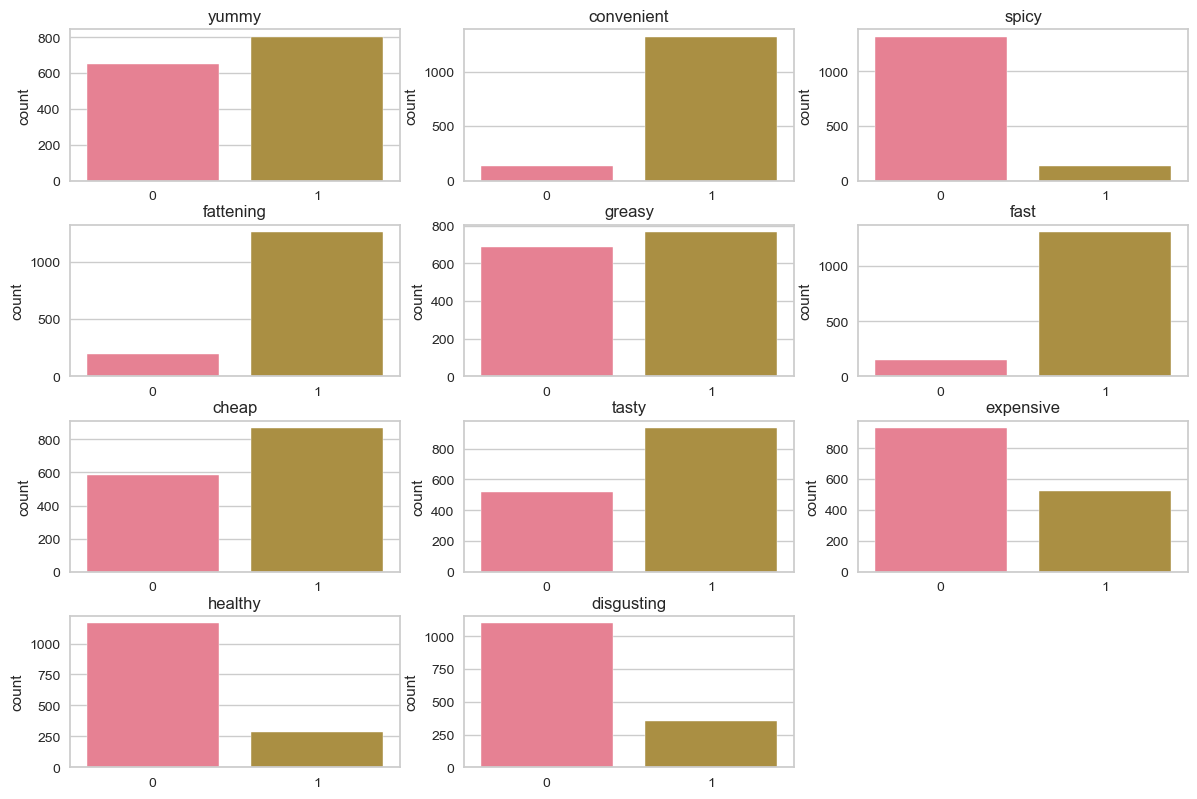

In [87]:
plot_countplot_grid(df,columns=['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting'])

Now perform standard scaler on this data. For this we only need to consider the numerical data. So, let's convert a separate dataframe of numerical data.

In [88]:
df_num = df[columns_to_encode]

In [89]:
df_num.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0


In [90]:
from sklearn.preprocessing import StandardScaler
sc  = StandardScaler()
df_scaled = sc.fit_transform(df_num)

In [91]:
scaled_df = pd.DataFrame(df_scaled,columns=df.columns[:11])
scaled_df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,-1.111479,0.318735,-0.321349,0.391375,-1.054476,0.332951,0.818605,-1.345528,1.339489,-0.498279,-0.566488
1,0.899702,0.318735,-0.321349,0.391375,0.948339,0.332951,0.818605,0.743203,1.339489,-0.498279,-0.566488
2,-1.111479,0.318735,3.111884,0.391375,0.948339,0.332951,-1.221590,0.743203,1.339489,2.006908,-0.566488
3,0.899702,0.318735,-0.321349,0.391375,0.948339,0.332951,0.818605,0.743203,-0.746553,-0.498279,1.765261
4,-1.111479,0.318735,-0.321349,0.391375,0.948339,0.332951,0.818605,-1.345528,-0.746553,2.006908,-0.566488
...,...,...,...,...,...,...,...,...,...,...,...
1448,-1.111479,0.318735,-0.321349,0.391375,0.948339,-3.003446,-1.221590,-1.345528,1.339489,-0.498279,1.765261
1449,0.899702,0.318735,-0.321349,0.391375,-1.054476,-3.003446,0.818605,0.743203,-0.746553,2.006908,-0.566488
1450,0.899702,0.318735,-0.321349,0.391375,-1.054476,0.332951,-1.221590,0.743203,1.339489,-0.498279,-0.566488
1451,0.899702,0.318735,-0.321349,-2.555092,-1.054476,0.332951,0.818605,0.743203,-0.746553,2.006908,-0.566488


### Principal component analysis

In [92]:
from sklearn.decomposition import PCA
pca = PCA(n_components=11)
pc = pca.fit_transform(scaled_df)
pf = pd.DataFrame(data = pc, columns = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11'])
pf

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,0.704334,-0.437016,0.268698,-0.872074,-1.521184,0.470160,-0.030969,-0.687116,0.367598,0.321161,1.701170
1,-0.467820,0.364277,-1.596835,-0.004835,0.462385,-0.449321,0.087351,0.446003,0.221855,0.191268,1.467681
2,0.191986,1.712949,-0.339413,3.368168,-1.266802,0.148058,-0.606634,-0.668576,1.377226,-1.259300,-0.128530
3,-0.116991,-1.155122,-1.003913,0.469589,1.141750,-0.857182,0.015843,0.390275,-1.578539,0.092189,-0.233201
4,-0.034724,-1.390267,0.792275,0.473031,-0.270488,-0.847963,-1.804085,-0.700019,1.630339,0.092449,-0.033144
...,...,...,...,...,...,...,...,...,...,...,...
1448,3.499105,1.069999,0.148971,-0.195977,0.787923,1.016536,-1.977414,0.049487,-0.964269,0.070579,0.155016
1449,-1.568786,0.899328,1.192503,-0.286497,2.234500,1.258306,-1.764159,-1.705500,-0.232987,-0.036497,0.039392
1450,-0.414275,1.810438,-1.071948,-0.901031,-0.750299,0.065975,0.720962,-0.397984,-0.344847,0.098558,0.118205
1451,-2.803630,0.562759,2.278887,0.083924,0.080147,-0.969368,-0.384558,0.604123,-0.211434,0.083127,0.077614


Now let's print the Proportion of Variance and Cumulative Proportion Of variance of PCA.

In [93]:
# Print the information for the first 20 principal components
num_components = 11
for i in range(num_components):
    print("Principal Component", i+1)
    print("Standard Deviation:", pca.explained_variance_[i]**0.5)
    print("Proportion of Variance:", pca.explained_variance_ratio_[i])
    print("Cumulative Proportion of Variance:", sum(pca.explained_variance_ratio_[:i+1]))
    print()

Principal Component 1
Standard Deviation: 1.6772495856235228
Proportion of Variance: 0.25556636941954913
Cumulative Proportion of Variance: 0.25556636941954913

Principal Component 2
Standard Deviation: 1.2778684213306495
Proportion of Variance: 0.14834762332752885
Cumulative Proportion of Variance: 0.40391399274707795

Principal Component 3
Standard Deviation: 1.175206565083135
Proportion of Variance: 0.1254690861122602
Cumulative Proportion of Variance: 0.5293830788593381

Principal Component 4
Standard Deviation: 1.040053491580873
Proportion of Variance: 0.09826970889617526
Cumulative Proportion of Variance: 0.6276527877555134

Principal Component 5
Standard Deviation: 0.9586196420158748
Proportion of Variance: 0.08348356062198281
Cumulative Proportion of Variance: 0.7111363483774962

Principal Component 6
Standard Deviation: 0.8846127837500539
Proportion of Variance: 0.07109101898621514
Cumulative Proportion of Variance: 0.7822273673637113

Principal Component 7
Standard Deviation:

The interpretation of the output is as follows: The matrix provides information about each principal component (PC), including its standard deviation, proportion of explained variance of the original variables, and cumulative proportion of explained variance. The cumulative proportion and proportion of explained variance are particularly important.

In this specific case, Principal Component 1 accounts for approximately one-fourth (25%) of the variance in the original data. Principal Component 2 explains about one-sevennth (15%) approx of the variance. When combined, these two components account for a total of 40% of the variation in the original data.

Overall, this information helps us understand the relative importance of each principal component in explaining the variability in the original data. The observation that the initial principal components have low variance suggests that all of the original items or survey questions are necessary as segmentation variables. They are not redundant, as each item contributes unique and valuable information to the analysis.

Now let's print the principal component according to the variable names.

In [94]:
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = df_num.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
variable,,,,,,,,,,,
yummy,-0.406955,0.282615,-0.259588,0.026237,0.346857,-0.124916,0.159878,0.016587,-0.195341,0.691446,-0.091851
convenient,-0.308827,-0.045682,-0.317151,-0.009424,-0.437148,0.188966,-0.661814,0.150033,-0.336539,0.028831,0.021460
spicy,-0.023320,0.069982,0.020170,0.845496,-0.185551,0.438661,0.214188,-0.027835,0.025239,0.058187,-0.041960
fattening,0.177861,-0.205590,-0.608077,-0.023396,0.086934,0.107520,-0.023851,-0.720478,0.105052,-0.020311,-0.074626
greasy,0.267796,-0.136300,-0.389568,0.330854,0.343713,-0.278329,-0.307300,0.487275,0.346137,-0.015160,-0.031047
fast,-0.213039,-0.282441,-0.211395,0.090363,-0.568939,-0.572734,0.392436,0.055976,0.099235,0.017917,-0.054448
cheap,-0.289134,-0.575032,0.125157,0.114477,0.256981,0.020657,-0.008895,-0.064667,-0.062027,0.060323,0.691923
tasty,-0.426115,0.242199,-0.269648,0.072691,0.286099,-0.053053,0.197364,0.059289,-0.213587,-0.713426,0.006426
expensive,0.290944,0.567528,-0.183298,0.035510,-0.207362,-0.171160,0.015198,-0.061727,-0.009675,0.029581,0.693614


Let's plot correlation matrix of the plot.

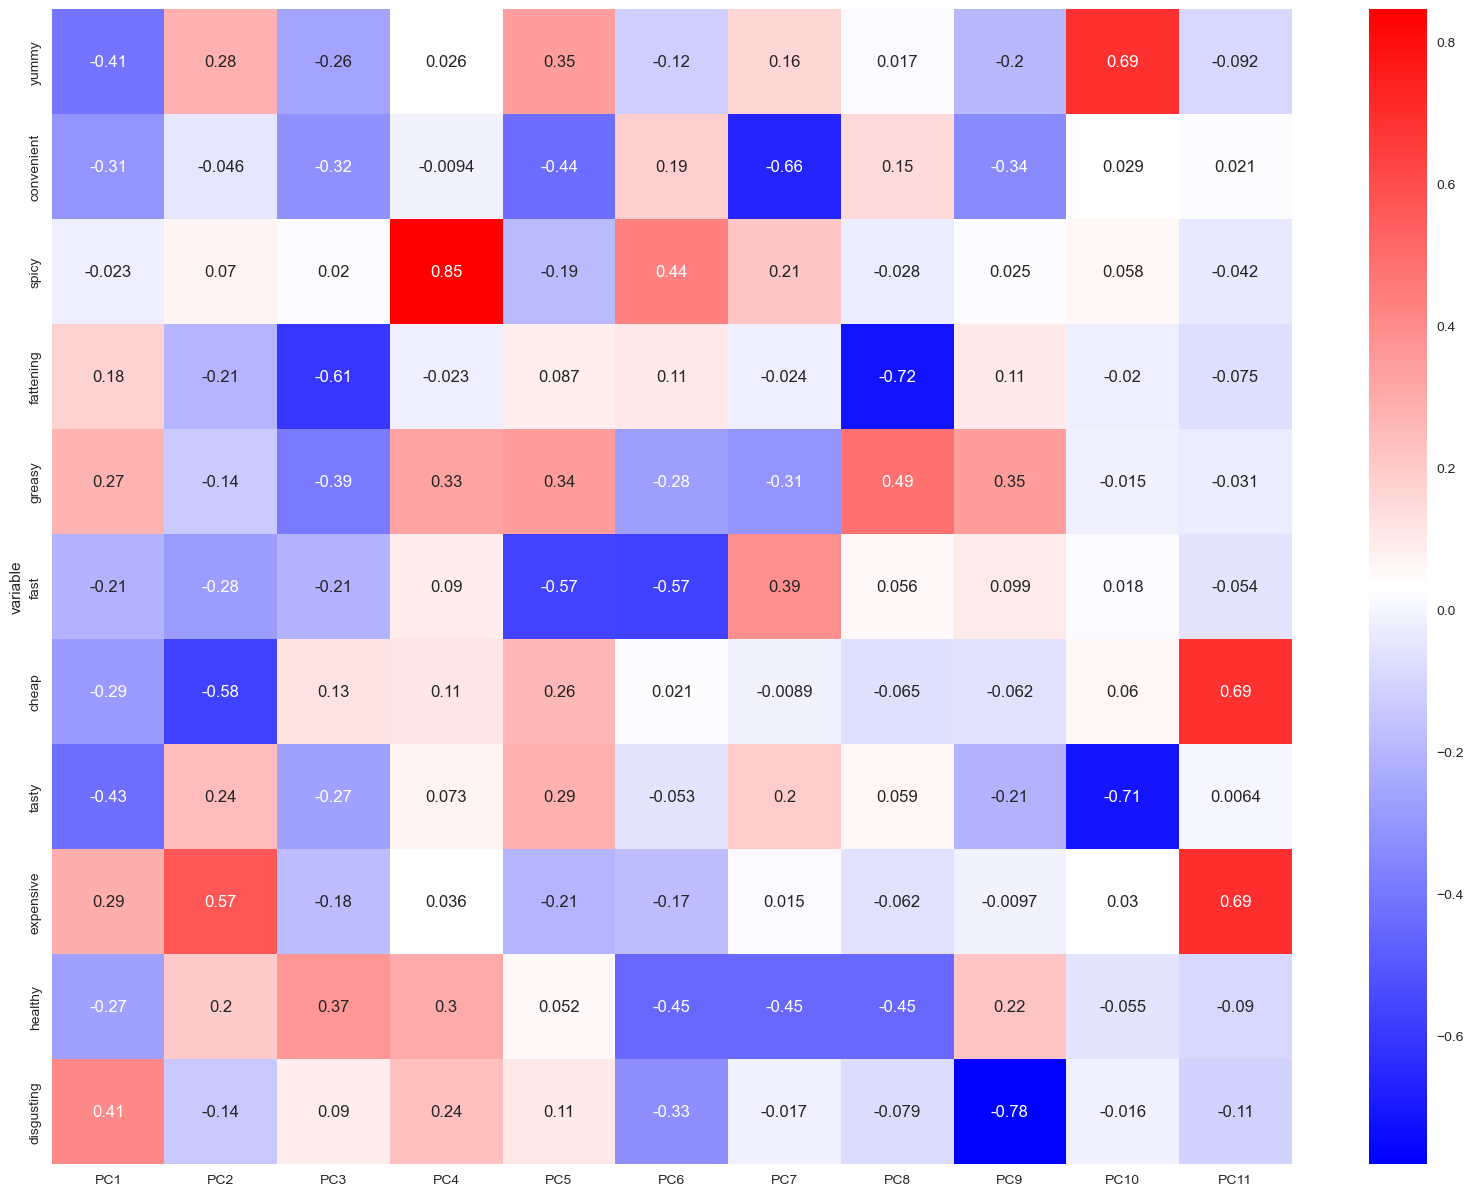

In [95]:
plt.rcParams['figure.figsize'] = (20,15)
ax = sns.heatmap(loadings_df, annot=True, cmap='bwr')
plt.show()

So, now we have printed the correlation matrix of principal components with variables. Now let's plot the explained variance ratio.

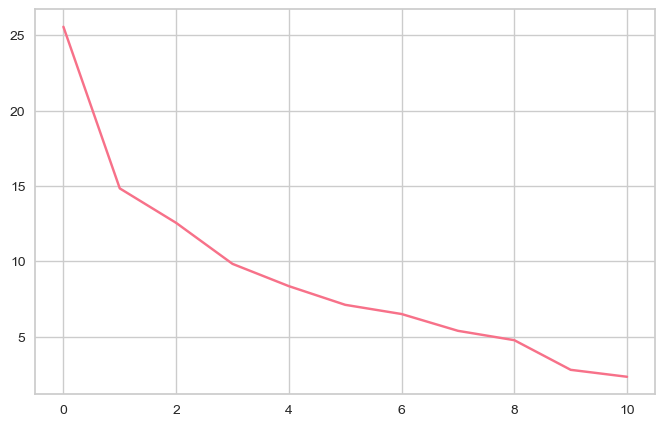

In [96]:
plt.figure(figsize=(8,5))
plt.plot(pca.explained_variance_ratio_*100);

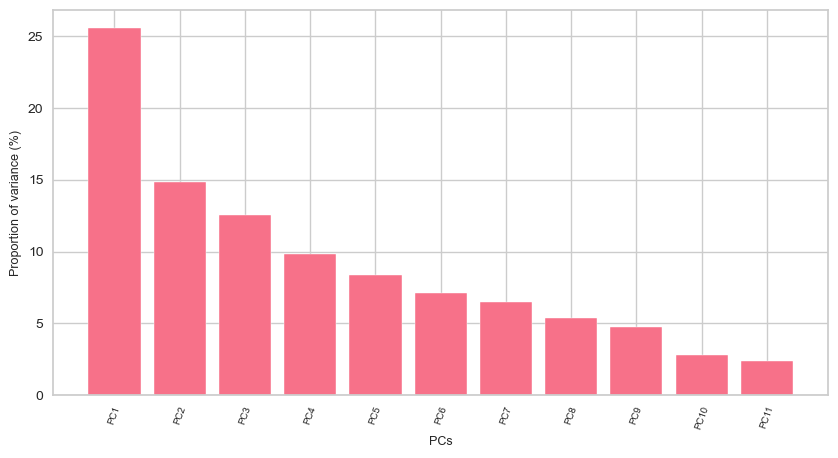

In [97]:
from bioinfokit.visuz import cluster
cluster.screeplot(obj=[pc_list, pca.explained_variance_ratio_],show=True,dim=(10,5))

In [98]:
names = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11']
pf = pd.DataFrame(data = pc, columns = names)
std_dev = []
for i in names:
    std_dev.append(np.std(pf[i]))
    
print("Standard Deviation")
np.array(std_dev)

Standard Deviation


array([1.67667232, 1.27742861, 1.17480209, 1.03969553, 0.95828971,
       0.88430832, 0.84548297, 0.76960542, 0.72381556, 0.55461848,
       0.50680804])

In [99]:
cp = np.cumsum(pca.explained_variance_ratio_)
print("Cumulative Proportion")
cp

Cumulative Proportion


array([0.25556637, 0.40391399, 0.52938308, 0.62765279, 0.71113635,
       0.78222737, 0.84721295, 0.90105773, 0.94868581, 0.9766496 ,
       1.        ])

Now let's plot the graph.

C:\Users\ardra\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.



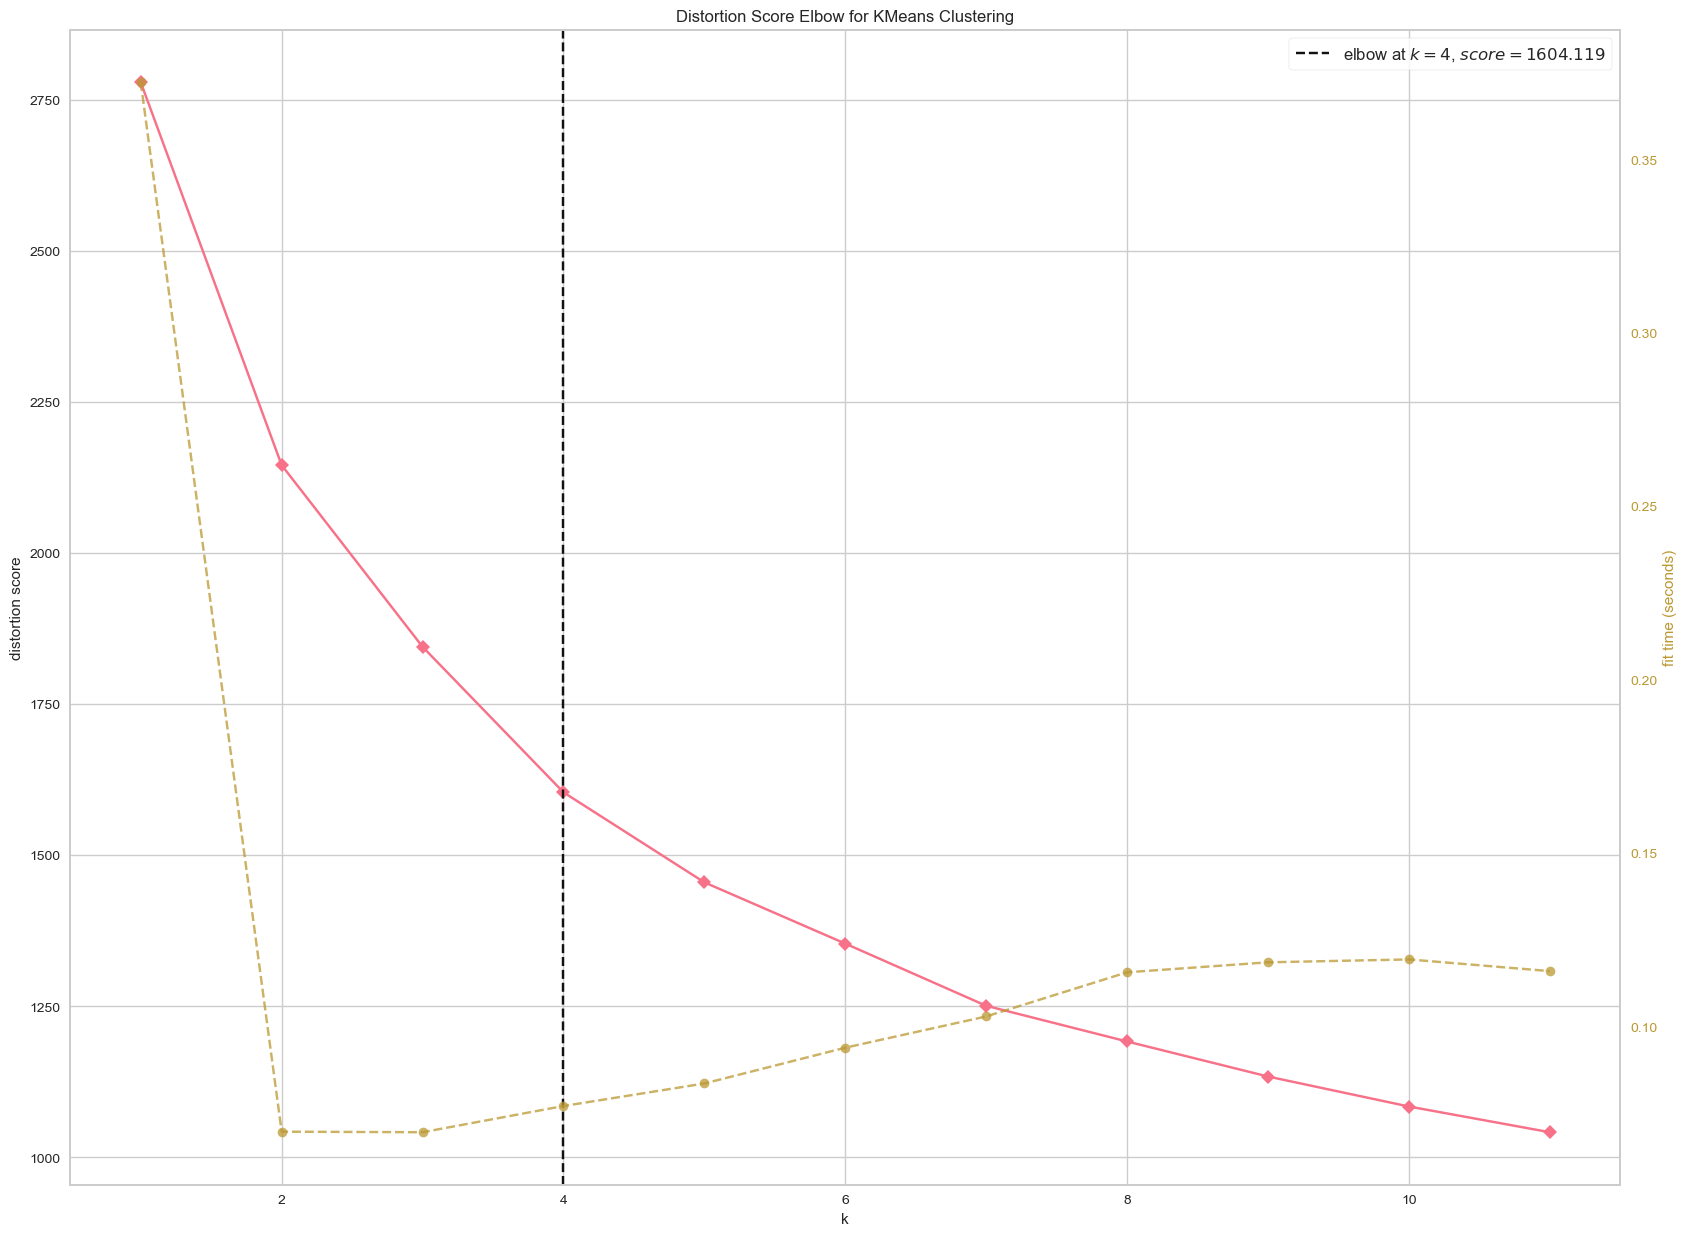

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [100]:
cat = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']
mcd_eleven = df.loc[:,cat]
mcd_eleven
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(mcd_eleven)
visualizer.show()

In [101]:
x = df.loc[:,cat].values
from sklearn import preprocessing
pca_data = preprocessing.scale(x)

pca = PCA(n_components=11)
pc = pca.fit_transform(x)
names = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11']
pf = pd.DataFrame(data = pc, columns = names)
pf

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245
...,...,...,...,...,...,...,...,...,...,...,...
1448,1.550242,0.275031,-0.013737,0.200604,-0.145063,0.306575,-0.075308,0.345552,-0.136589,-0.432798,-0.456076
1449,-0.957339,0.014308,0.303843,0.444350,-0.133690,0.381804,-0.326432,0.878047,-0.304441,-0.247443,-0.193671
1450,-0.185894,1.062662,0.220857,-0.467643,-0.187757,-0.192703,-0.091597,-0.036576,0.038255,0.056518,-0.012800
1451,-1.182064,-0.038570,0.561561,0.701126,0.047645,0.193687,-0.027335,-0.339374,0.022267,-0.002573,-0.105316


In [102]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(mcd_eleven)
df['cluster_num'] = kmeans.labels_
print (kmeans.labels_) 
print (kmeans.inertia_)  
print(kmeans.n_iter_) 
print(kmeans.cluster_centers_)

[2 0 0 ... 0 1 3]
1603.060444055892
7
[[0.85448916 0.9628483  0.13312693 0.90712074 0.61919505 0.86068111
  0.10835913 0.93188854 0.89783282 0.20433437 0.10526316]
 [0.88793103 0.98103448 0.0862069  0.79482759 0.32931034 0.96034483
  0.92241379 0.97586207 0.01724138 0.32068966 0.04310345]
 [0.02302632 0.89144737 0.07236842 0.92434211 0.66776316 0.96381579
  0.93421053 0.15460526 0.01315789 0.07236842 0.38815789]
 [0.0203252  0.68292683 0.08536585 0.91463415 0.69512195 0.73170732
  0.06504065 0.08943089 0.87804878 0.06097561 0.71544715]]


In [103]:
from collections import Counter
Counter(kmeans.labels_)

Counter({2: 304, 0: 323, 1: 580, 3: 246})

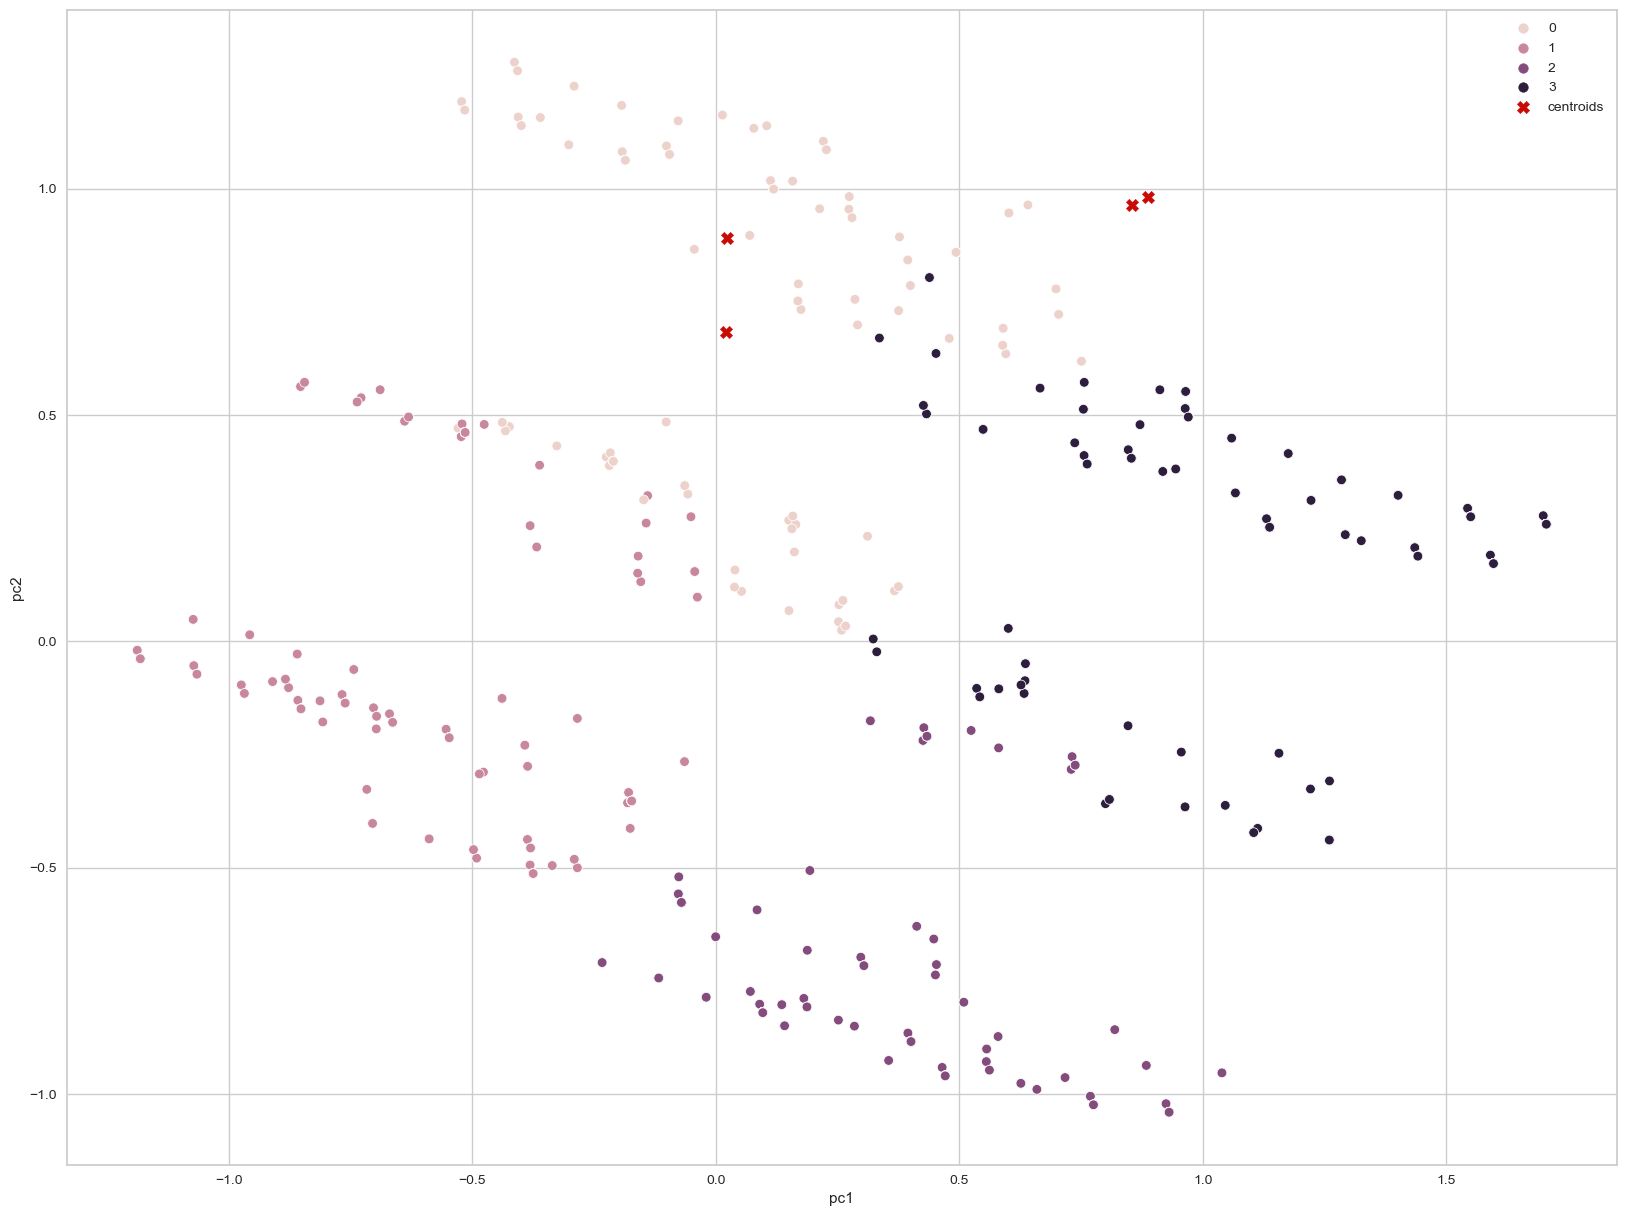

In [104]:
sns.scatterplot(data=pf, x="pc1", y="pc2", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

In [105]:
mcd_data2=pd.get_dummies(df, prefix=['cluster_num'], columns=['cluster_num'])
mcd_data2.head(4)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster_num_0,cluster_num_1,cluster_num_2,cluster_num_3
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female,0,0,1,0
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female,1,0,0,0
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female,1,0,0,0
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female,0,1,0,0


In [106]:
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

crosstab =pd.crosstab(df['cluster_num'],df['Like'])
crosstab = crosstab[['-5','-4','-3','-2','-1','0','+1','+2','+3','+4','+5']]
crosstab 

Like,-5,-4,-3,-2,-1,0,+1,+2,+3,+4,+5
cluster_num,,,,,,,,,,,
0,5,3,7,6,7,36,42,60,66,47,44
1,4,4,2,6,13,43,65,90,143,111,99
2,54,36,34,28,25,51,31,31,12,2,0
3,89,28,30,19,13,39,14,6,8,0,0


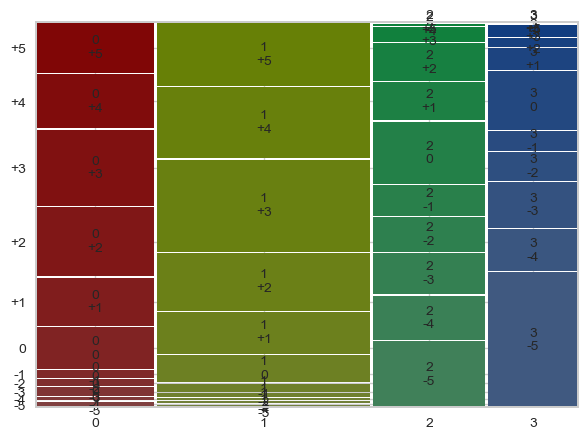

In [107]:
plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab.stack())
plt.show()

In [108]:
crosstab_gender =pd.crosstab(df['cluster_num'],df['Gender'].replace({1: 'Male', 0: 'Female'}))
crosstab_gender

Gender,Female,Male
cluster_num,,
0,154,169
1,349,231
2,179,125
3,106,140


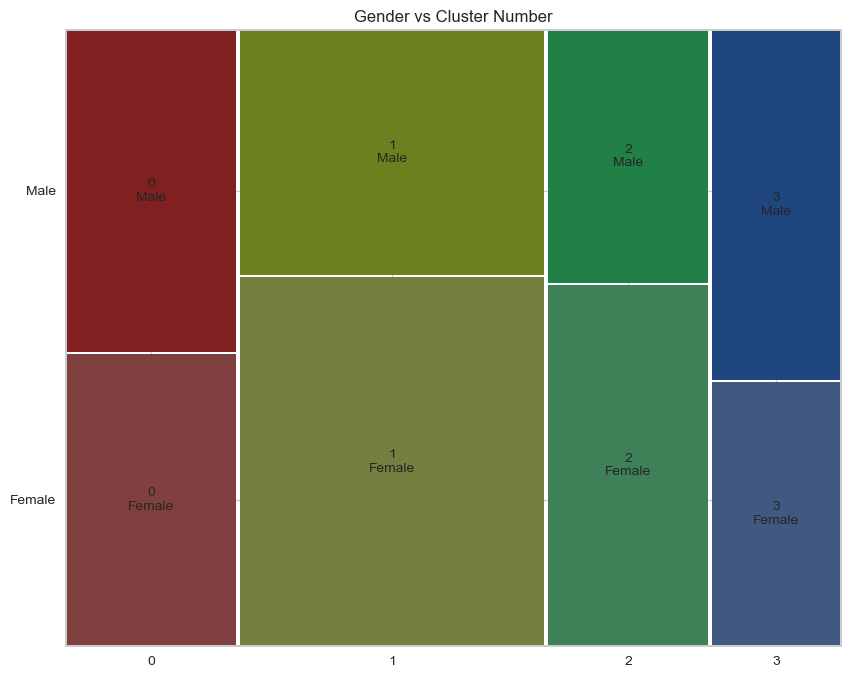

In [109]:
plt.rcParams['figure.figsize'] = (7,5)
fig, ax = plt.subplots(figsize=(10, 8))
mosaic(crosstab_gender.stack(), ax=ax, title='Gender vs Cluster Number')
plt.show()

<AxesSubplot:xlabel='cluster_num', ylabel='Age'>

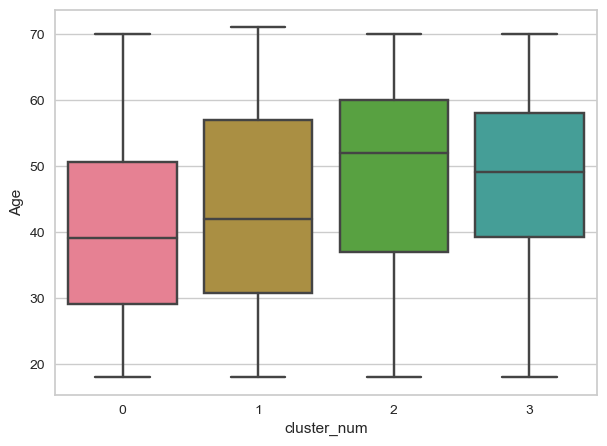

In [110]:
sns.boxplot(x="cluster_num", y="Age", data=df)

In [111]:
df['VisitFrequency'] = LabelEncoder().fit_transform(df['VisitFrequency'])
visit = df.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,2.547988
1,1,2.584483
2,2,2.822368
3,3,2.654472


In [112]:
df['Like'] = LabelEncoder().fit_transform(df['Like'])
Like = df.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_num,Like
0,0,3.275542
1,1,2.962069
2,2,6.171053
3,3,7.422764


In [113]:
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
Gender = df.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_num,Gender
0,0,0.523220
1,1,0.398276
2,2,0.411184
3,3,0.569106


In [114]:
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
segment

,cluster_num,Gender,Like,VisitFrequency
0,0,0.523220,3.275542,2.547988
1,1,0.398276,2.962069,2.584483
2,2,0.411184,6.171053,2.822368
3,3,0.569106,7.422764,2.654472


In [116]:
df1=df.iloc[:,0:11]
scaled_df = scalar.fit_transform(df1)

pca = PCA(n_components=11)
principal_components = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data=principal_components ,columns=["PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9","PCA10","PCA11"])
pca_df.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11
0,0.704334,-0.437016,0.268698,-0.872074,-1.521184,0.470160,-0.030969,-0.687116,0.367598,0.321161,1.701170
1,-0.467820,0.364277,-1.596835,-0.004835,0.462385,-0.449321,0.087351,0.446003,0.221855,0.191268,1.467681
2,0.191986,1.712949,-0.339413,3.368168,-1.266802,0.148058,-0.606634,-0.668576,1.377226,-1.259300,-0.128530
3,-0.116991,-1.155122,-1.003913,0.469589,1.141750,-0.857182,0.015843,0.390275,-1.578539,0.092189,-0.233201
4,-0.034724,-1.390267,0.792275,0.473031,-0.270488,-0.847963,-1.804085,-0.700019,1.630339,0.092449,-0.033144


<AxesSubplot:xlabel='PCA1', ylabel='PCA2'>

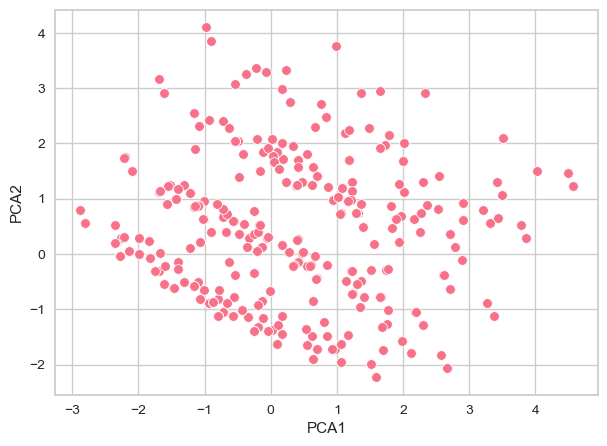

In [117]:
sns.scatterplot(data=pca_df, x="PCA1", y="PCA2", palette="deep")

C:\Users\ardra\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.



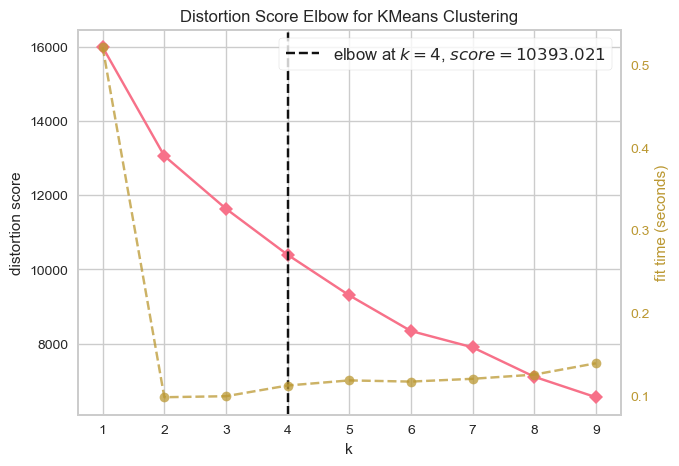

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [118]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(scaled_df)       
visualizer.show()  

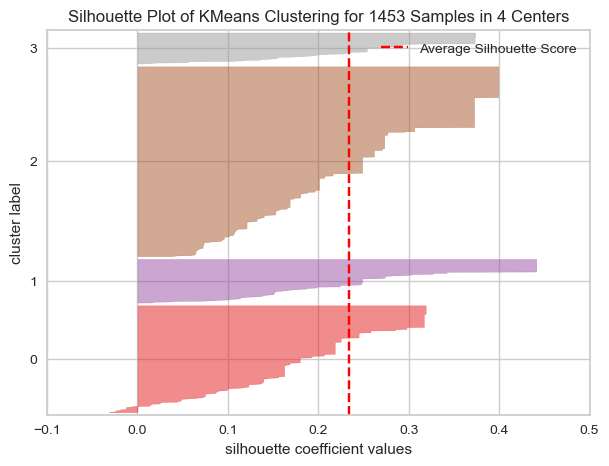

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 1453 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [119]:
from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(4)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(scaled_df)
visualizer.show()

In [120]:
kmeans_model=KMeans(4)
kmeans_model.fit_predict(scaled_df)
pca_df_kmeans1= pd.concat([df1,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)
pca_df_kmeans1.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,cluster
0,0,1,0,1,0,1,1,0,1,0,0,2
1,1,1,0,1,1,1,1,1,1,0,0,2
2,0,1,1,1,1,1,0,1,1,1,0,2
3,1,1,0,1,1,1,1,1,0,0,1,1
4,0,1,0,1,1,1,1,0,0,1,0,1


In [121]:
cluster_1_df = pca_df_kmeans1[pca_df_kmeans1["cluster"]==0]
cluster_1_df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,cluster
17,1,1,0,0,1,1,0,1,0,0,0,0
28,0,1,0,0,0,1,0,0,0,0,0,0
31,0,1,0,0,0,1,1,1,0,1,0,0
46,0,1,0,0,0,1,0,1,0,1,0,0
54,1,1,0,0,0,1,1,1,0,1,0,0


In [122]:
cluster_2_df = pca_df_kmeans1[pca_df_kmeans1["cluster"]==1]
cluster_2_df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,cluster
3,1,1,0,1,1,1,1,1,0,0,1,1
4,0,1,0,1,1,1,1,0,0,1,0,1
5,1,1,0,1,0,1,1,1,0,0,0,1
7,1,1,0,1,1,1,1,1,0,0,0,1
12,0,1,0,1,0,1,1,0,0,0,0,1


In [123]:
cluster_4_df = pca_df_kmeans1[pca_df_kmeans1["cluster"]==3]
cluster_4_df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,cluster
8,0,0,0,1,1,0,0,0,1,0,1,3
10,0,1,0,1,0,1,1,0,0,0,1,3
18,0,0,0,1,1,1,1,0,1,0,1,3
33,0,1,0,1,1,1,1,0,0,0,1,3
35,0,1,0,1,1,1,1,0,0,0,1,3


In [124]:
df_new= pd.concat([df,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)
df_new.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster_num,cluster
0,0,1,0,1,0,1,1,0,1,0,0,7,61,0,0,2,2
1,1,1,0,1,1,1,1,1,1,0,0,1,51,0,0,0,2
2,0,1,1,1,1,1,0,1,1,1,0,0,62,0,0,0,2
3,1,1,0,1,1,1,1,1,0,0,1,3,69,4,0,1,1
4,0,1,0,1,1,1,1,0,0,1,0,1,49,3,1,2,1


In [125]:
df_new['VisitFrequency'].value_counts()

3    439
0    342
5    252
4    235
2    131
1     54
Name: VisitFrequency, dtype: int64

In [126]:
df_new["Like"]= df_new["Like"].replace({'I hate it!-5':0, '-4':1, '-3':2, '-2':3, '-1':4, '0':5, '+1':6, '+2':7, '+3':8, '+4':9, 'I love it!+5':10})
df_new["Gender"]= df_new["Gender"].replace({'Female':0, 'Male':1})
df_new

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster_num,cluster
0,0,1,0,1,0,1,1,0,1,0,0,7,61,0,0,2,2
1,1,1,0,1,1,1,1,1,1,0,0,1,51,0,0,0,2
2,0,1,1,1,1,1,0,1,1,1,0,0,62,0,0,0,2
3,1,1,0,1,1,1,1,1,0,0,1,3,69,4,0,1,1
4,0,1,0,1,1,1,1,0,0,1,0,1,49,3,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,9,47,5,1,3,3
1449,1,1,0,1,0,0,1,1,0,1,0,1,36,4,0,1,1
1450,1,1,0,1,0,1,0,1,1,0,0,2,52,3,0,0,2
1451,1,1,0,0,0,1,1,1,0,1,0,3,41,0,1,1,0


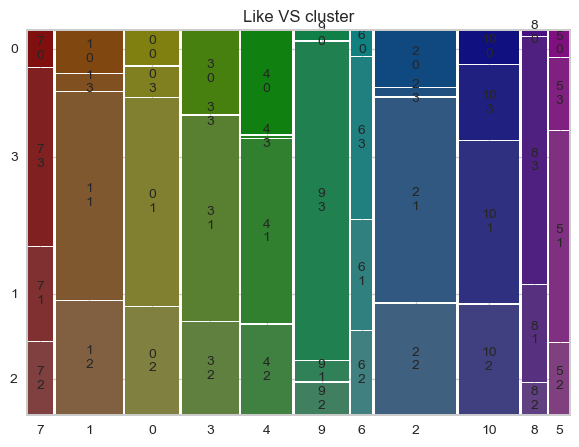

In [127]:
from statsmodels.graphics.mosaicplot import mosaic

mosaic(df_new, ['Like','cluster'],title='Like VS cluster')
plt.show()

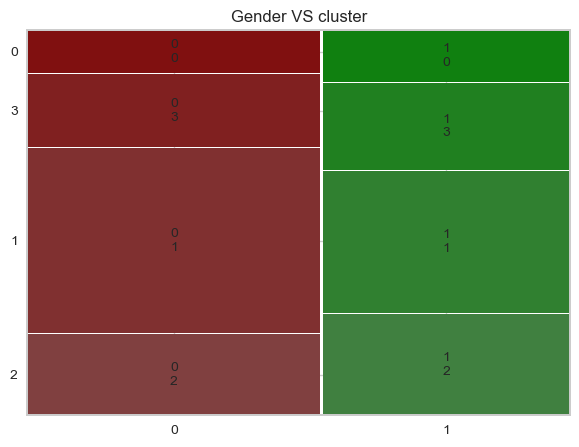

In [128]:
mosaic(df_new, ['Gender','cluster'],title='Gender VS cluster')
plt.show()

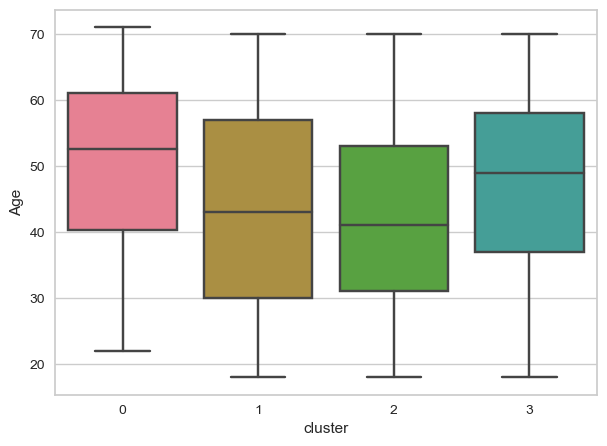

In [129]:
sns.boxplot(x=df_new['cluster'], y=df_new['Age'])
plt.show()

In [130]:
X = df_new.drop(['cluster'],axis=1)
y= df_new[['cluster']]
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3)

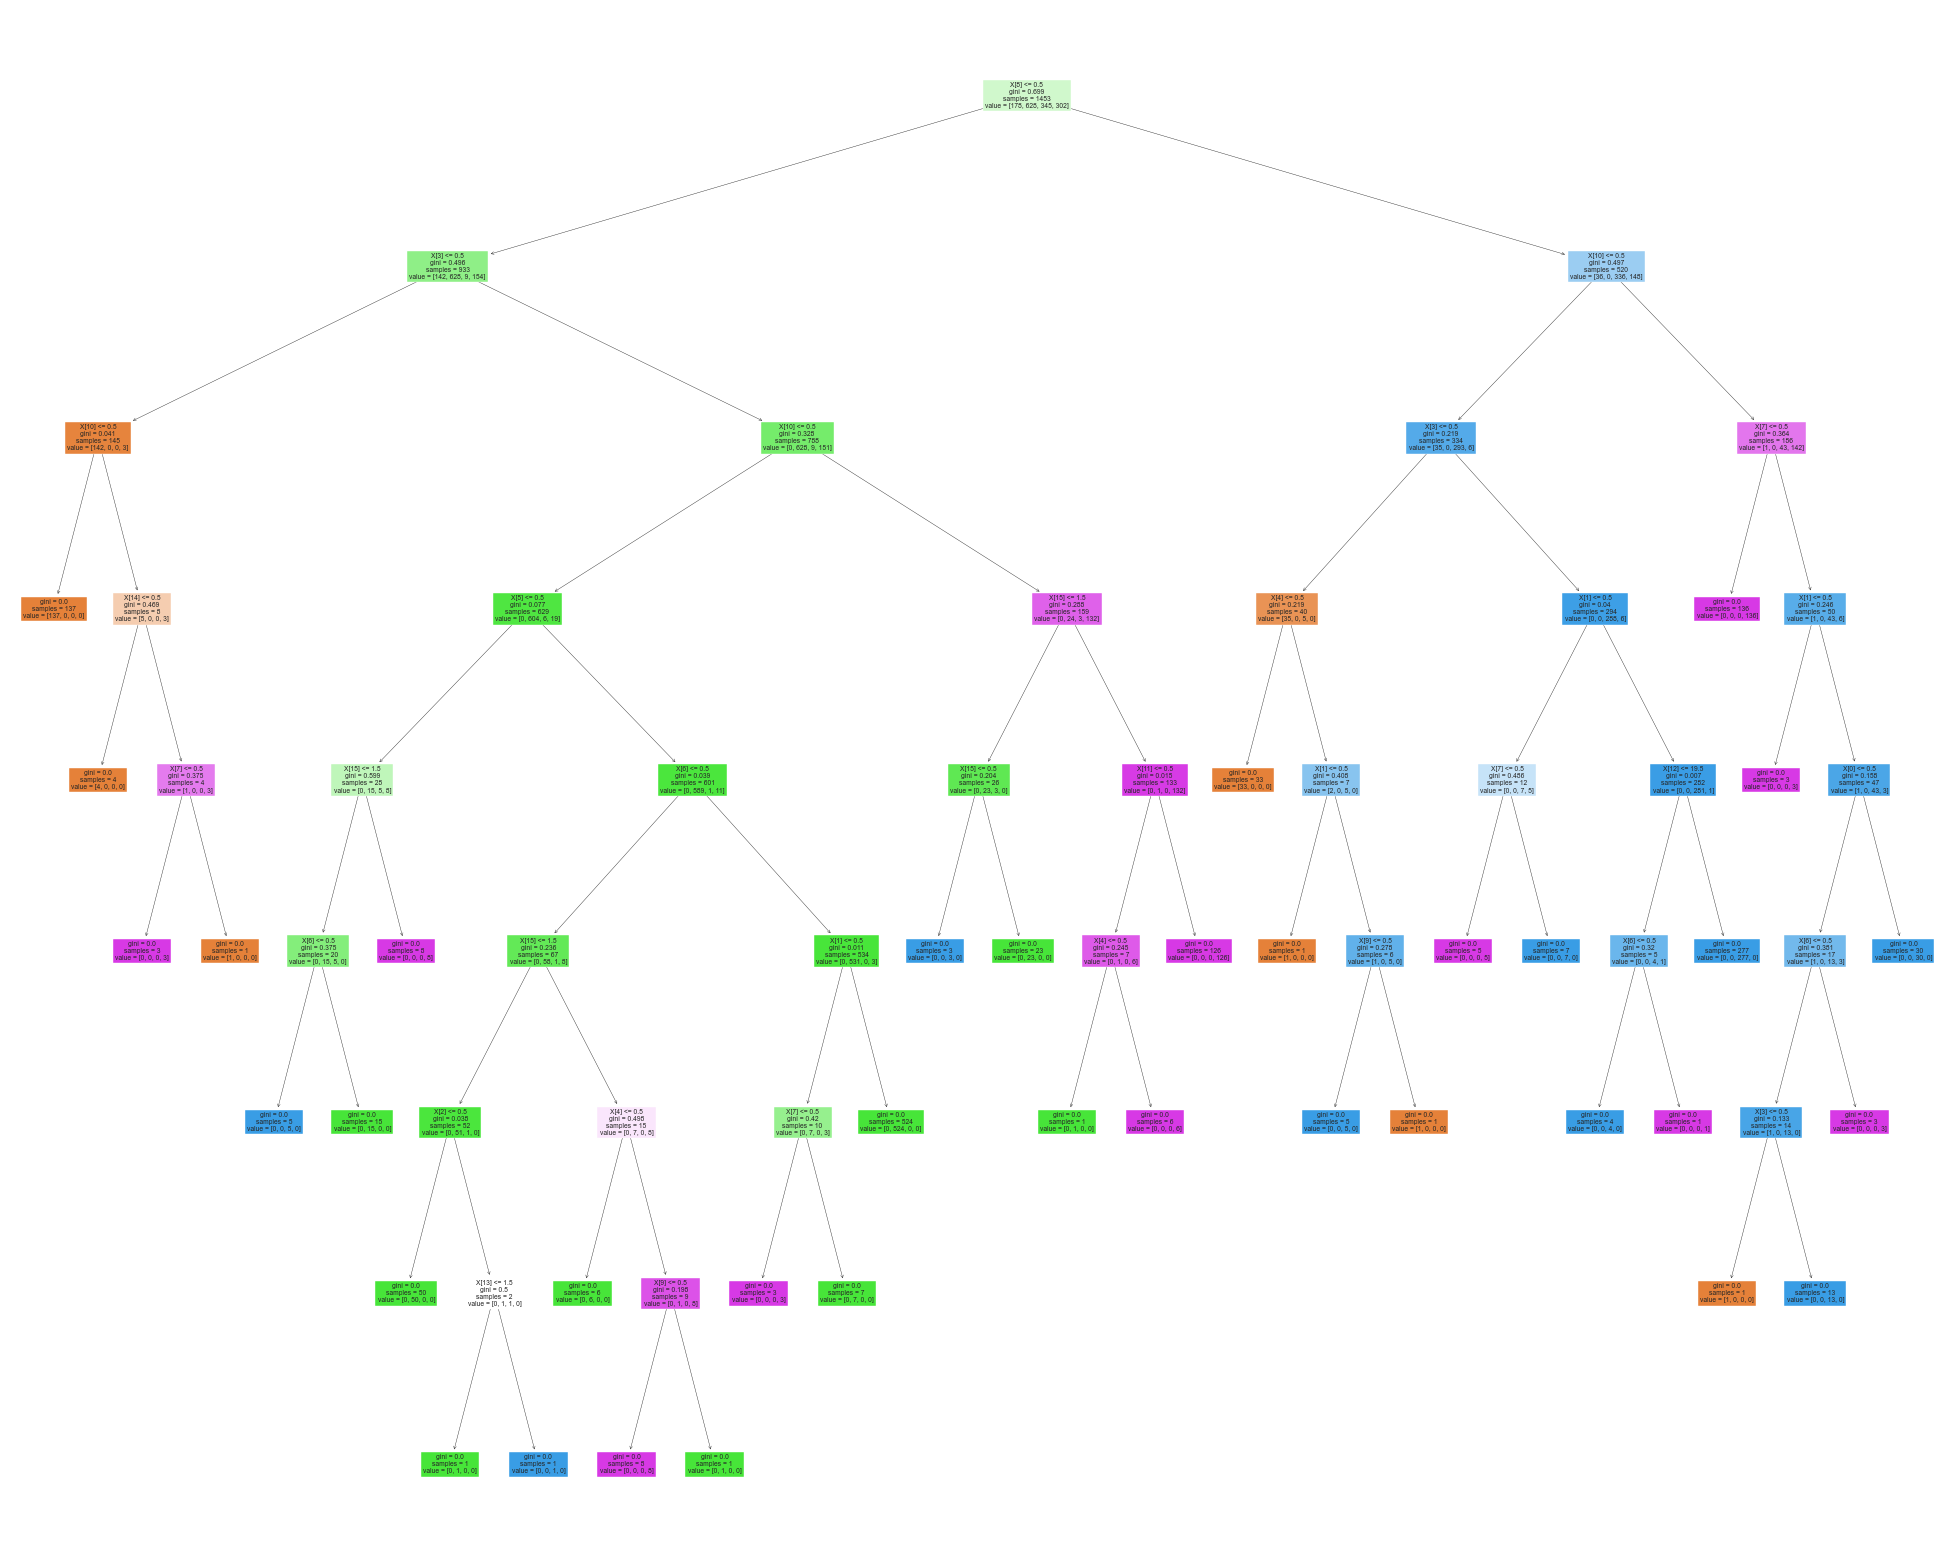

In [131]:
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(X, y)
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,   filled=True)

In [132]:
model= DecisionTreeClassifier(criterion="entropy")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 48   0   2   0]
 [  0 178   0   1]
 [  0   0 103   0]
 [  3   2   3  96]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        50
           1       0.99      0.99      0.99       179
           2       0.95      1.00      0.98       103
           3       0.99      0.92      0.96       104

    accuracy                           0.97       436
   macro avg       0.97      0.97      0.97       436
weighted avg       0.98      0.97      0.97       436



In [133]:
import pickle
filename = 'model.pkl'
pickle.dump(model, open(filename, 'wb'))
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result,'% Acuuracy')

0.9747706422018348 % Acuuracy
